In [1]:
import pandas as pd
from google.colab import files
files.upload()

Saving data tweet ppkm.csv to data tweet ppkm.csv
Saving slangword.csv to slangword.csv
Saving stopwords.txt to stopwords.txt
Saving StopWords_noise.txt to StopWords_noise.txt


{'StopWords_noise.txt': b'&\r\na\r\naa\r\naadc\r\naah\r\naak\r\naampw\r\naarrggh\r\naasep\r\naasl\r\nad\r\nadl\r\nadlh\r\naduh\r\naduw\r\nae\r\naek\r\nag\r\nagk\r\nah\r\naha\r\nahaha\r\naj\r\nak\r\naka\r\nakaka\r\nakakom\r\nakd\r\nakk\r\nakkh\r\nakn\r\nakng\r\nakyu\r\nal\r\nala\r\nalt\r\nam\r\nama\r\namp\r\nan\r\nand\r\nanu\r\nap\r\napatah\r\napayg\r\nape\r\napec\r\napjii\r\nar\r\narh\r\nas\r\nash\r\nass\r\nath\r\nato\r\natr\r\natw\r\nau\r\naw\r\nayo\r\nayoo\r\naz\r\nb\r\nba\r\nbah\r\nbak\r\nbay\r\nbb\r\nbc\r\nbdn\r\nbdp\r\nbe\r\nbea\r\nbee\r\nbehe\r\nbem\r\nben\r\nbeng\r\nbeul\r\nbf\r\nbfast\r\nbfi\r\nbg\r\nbgaya\r\nbgtbisa\r\nbgtmana\r\nbh\r\nbhs\r\nbi\r\nbin\r\nbl\r\nbla\r\nblabla\r\nblmpu\r\nbr\r\nbshare\r\nbsia\r\nbtw\r\nbu\r\nbuahe\r\nbun\r\nbw\r\nbwt\r\nc\r\nca\r\ncab\r\ncah\r\ncak\r\ncaln\r\ncc\r\ncf\r\ncha\r\ncie\r\nciecie\r\nciee\r\ncieh\r\nciek\r\nciey\r\ncih\r\ncik\r\nciyee\r\nciye\r\nciyeh\r\nck\r\nckckck\r\ncla\r\ncln\r\ncms\r\ncnn\r\nco\r\ncok\r\ncom\r\ncoy\r\ncp\r\ncr\r

In [112]:
df_text = pd.read_csv('/content/data tweet ppkm.csv')

In [113]:
df_text = df_text.drop_duplicates(subset=['text'],keep = 'first')
df_text.shape

(7649, 3)

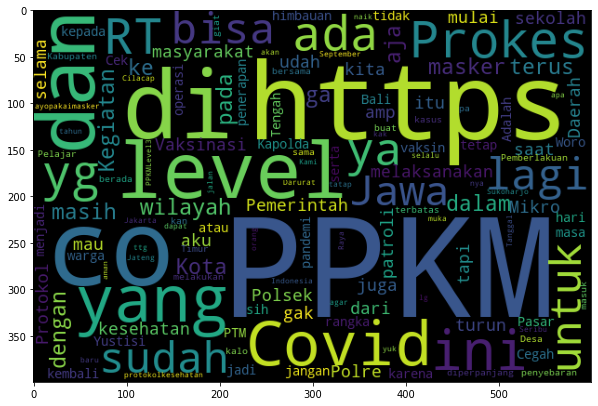

In [114]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
word = WordCloud(width=600,height=400,margin=1,min_font_size=8,max_words=150,collocations=False).generate(' '.join(df_text['text']))
plt.imshow(word)

In [115]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
!pip install Sastrawi
stop = nltk.corpus.stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
slangword = pd.read_csv('/content/slangword.csv',delimiter=':')
slangword

,abnormal,normal
0,4ever,selamanya
1,abg,remaja
2,abis,selesai
3,abng,abang
4,abjat,abjad
...,...,...
2495,tlol,bodoh
2496,anjg,anjing
2497,anjng,anjing
2498,waria,banci


In [117]:
abnormal = slangword['abnormal'].values.tolist()
normal = slangword['normal'].values.tolist()

In [118]:
import re
import string
def remove_emoji(text):
  emoji_pattern = re.compile(
      '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        u'\U0001F923'
        ']+',flags= re.UNICODE)
  return emoji_pattern.sub(r'',text)
def remove_symbol(text):
  return re.sub(r'<\S+>','',text,flags=re.DOTALL)
def remove_hashtags(text):
  return re.sub(r'\B#\S+','',text)
def remove_mention(text):
  return re.sub(r'\B@\S+','',text)
def remove_url(text):
  return re.sub(r'https\S+','',text)
def remove_RT(text):
  return re.sub(r'RT @\w+:','',text)
def remove_punctuation(text):
  return re.sub('[%s]' % re.escape(string.punctuation),'',text)
def preprocess(text):
  text = remove_emoji(text)
  text = remove_symbol(text)
  text = remove_RT(text)
  text = remove_hashtags(text)
  text = remove_mention(text)
  text = remove_url(text)
  text = remove_punctuation(text)
  return text
df_text['clean'] = df_text['text'].apply(preprocess)
pd.set_option('max_colwidth',200)


In [119]:
newstop1 = open('/content/stopwords.txt','r').read().split()
stop.extend(newstop1)
newstop2 = open('/content/StopWords_noise.txt').read().split()
stop.extend(newstop2)
for x in ['ppkm','wkwk','vpn','ep','wkwkw','xixixi','haihai','35k','game','wkwkwk','nonton','menonton']:
  stop.append(x)

In [120]:
df_text.shape

(7649, 4)

In [121]:
def normalize_text(text,normal_,abnormal_):
  text = text.split(' ')
  for i in range(len(text)):
    if text[i] in abnormal_:
      index = abnormal_.index(text[i])
      text[i] = normal_[index]
  return ' '.join(map(str,text))
def normalize_data(df,normal_,abnormal_):
  df_text['clean'] = df_text['clean'].map(lambda x:normalize_text(x,normal_,abnormal_))
  return df
df_text = normalize_data(df_text,normal,abnormal)

In [122]:
def remove_stopwords(text):
  text = [word.lower() for word in text.lower().split() if word not in stop]
  return(' '.join(text))
def remove_word(text):
  text = [word for word in text.split() if len(word) >= 3]
  return(' '.join(text))
def process(text):
  text = remove_stopwords(text)
  text = remove_word(text)
  return text

df_text['clean'] = df_text['clean'].apply(process)
df_text_clean= df_text[~df_text.clean.str.contains('jual','toge')]

In [123]:
df_text_clean.shape

(7563, 4)

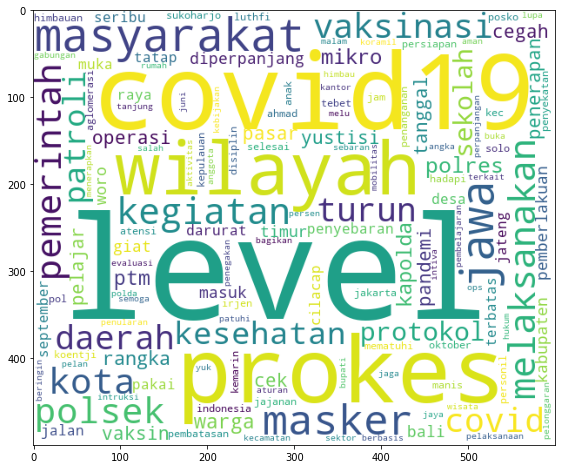

In [124]:
plt.figure(figsize=(12,8))
word3 = WordCloud(height=500,width=600,max_words=150,min_font_size=10,collocations=False,background_color='white').generate(' '.join(df_text_clean['clean']))
plt.imshow(word3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


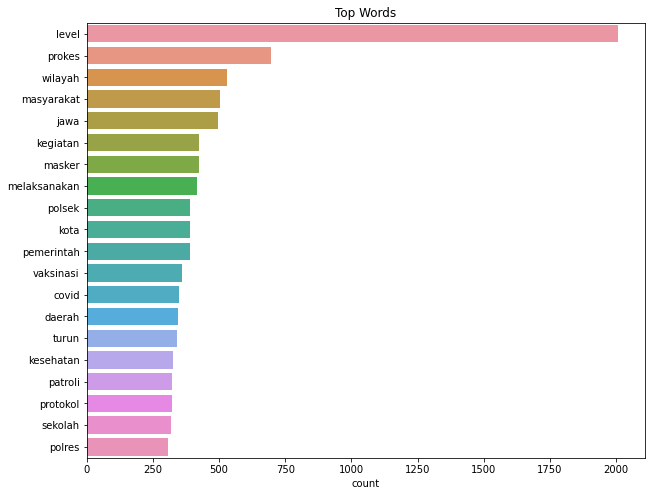

In [125]:
from nltk import word_tokenize,FreqDist,bigrams,trigrams
word_freq = FreqDist(word for word in word_tokenize(' '.join(df_text_clean['clean'])) if (word not in stop) & word.isalpha())
df_word = pd.DataFrame.from_dict(word_freq,orient='index',columns=['count'])
topwords = df_word.sort_values('count',ascending=False).head(20)
plt.figure(figsize=(10,8))
unigram = sns.barplot(topwords['count'],topwords.index)
plt.title('Top Words')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


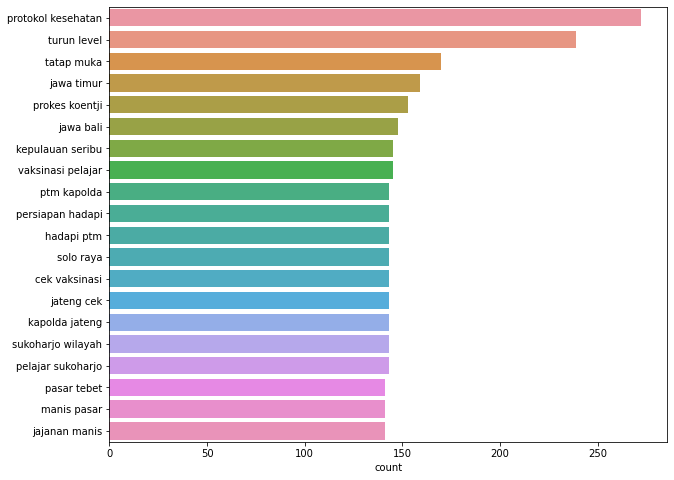

In [126]:
df_bg = list(bigrams([word for word in word_tokenize(' '.join(df_text['clean'])) if (word not in stop) & word.isalpha()]))
bigram = FreqDist(bg for bg in df_bg)
df_bigram = pd.DataFrame.from_dict(bigram,orient='index',columns=['count'])
df_bigram.index = df_bigram.index.map(lambda x: ' '.join(x))
df_bigram = df_bigram.sort_values('count',ascending=False) .head(20)
plt.figure(figsize=(10,8))
sns.barplot(df_bigram['count'],df_bigram.index)
plt.show()

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1,3),min_df=15,max_df=0.85)
tf_data = tfidf.fit_transform(df_text_clean['clean'])
tf_data.shape

(7563, 1686)

In [128]:
from sklearn.cluster import KMeans
#using elbow method to define the cluster
range_cluster = [2,3,4,5,6,7,8,9]
sse = []

for i in range_cluster:
  km = KMeans(n_clusters=i)
  km.fit(tf_data)
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Square distance')

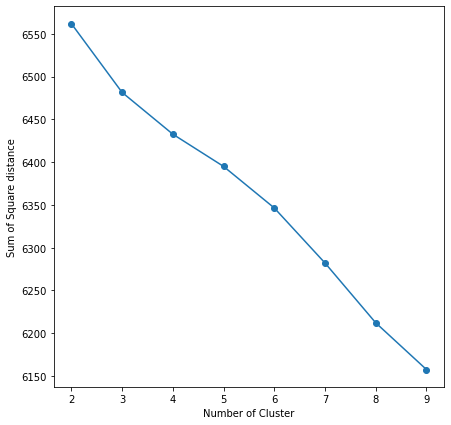

In [129]:
plt.figure(figsize=(7,7))
plt.plot(range_cluster,sse,'-o')
plt.xlabel(r'Number of Cluster')
plt.ylabel('Sum of Square distance')

In [130]:
num_cluster = 4
km = KMeans(num_cluster)
km.fit(tf_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
clusters = km.labels_.tolist()
df_text = df_text_clean[['text','clean']]
df_text['clusters'] = clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
feature_name = tfidf.get_feature_names()
top_features = 10
ordered_centroid = km.cluster_centers_.argsort()[:,::-1]
for cluster in range(num_cluster):
  key_features = [feature_name[index] for index in ordered_centroid[cluster,:top_features]]
  tweet = df_text[df_text['clusters']==cluster]['clean'].values.tolist()
  print('Cluster#' + str(cluster+1))
  print('Key_features:',key_features)
  print('Tweet:',tweet)
  print('--'*40)

Cluster#1
Key_features: ['covid19', 'diperpanjang', 'prokes', 'kemarin', 'pemerintah', 'selesai', 'pakai', 'vaksin', 'pandemi', 'pelan']
Tweet: ['pengen presiden mayor', 'pasangan favoritku', 'han kontrak putus berhazil', 'jaga jarak', 'astungkara daerah zona kuning lengah disiplin prokes penyebaran covid19 meningkat ekonomi tumbuh', 'seingetku buka drivethru jam', 'once upon time lift penuh hening “diana gendutan efek 10kg ya” mata padaku giliran ngobrol ber2 komen didepan lgsng komenin berat badan sengaja malunya teh🤢🤮', 'potret kekejaman cina komunis menertibkan pedagang kaki memperdulikan bayi tua', 'astungkara daerah zona kuning lengah disiplin prokes penyebaran covid19 meningkat ekonomi tumbuh', 'happy satnite lepel sholat menjaga jarak shalat ied ditiadakan kumpul2 acar…', 'nnti pemerintah disalahin trs anak sekola masuk mhs masuk2 terosss online teross lageeee mikir dikitt', 'akibat', 'mudahan sayang', 'pemilik krisna oleholeh bali gusti ngurah anom berharap pekerja penuh', 'ke